
![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Tarea numero 4**

**Predicción del Valor de Venta de Inmuebles***

**Metodos Estadisticos** <br>

Profesor: Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas
- Andrea Catalina Gomez
- Luisa Fernanda Rodriguez

# Introducción
En este ejercicio, analizarás un conjunto de datos de inmuebles para predecir el valor de venta (`valor_venta`) en función de sus características. Utilizarás tres modelos
- **Regresión Lineal**
- **Árbol de Decisión**
- **Random Forest**

 El proceso incluirá limpieza de datos, análisis exploratorio y evaluación del desempeño de los modelos.

---

## Descripción de las columnas
1. **`tipo_inmueble`**: Tipo de propiedad (e.g., Apartamento, Casa).
2. **`valor_venta`**: Valor de venta del inmueble en pesos colombianos.
3. **`area`**: Área del inmueble en metros cuadrados.
4. **`nro_cuartos`**: Número de cuartos en la propiedad.
5. **`nro_banos`**: Número de baños en la propiedad.
6. **`nro_garajes`**: Número de garajes disponibles.
7. **`zona`**: Zona geográfica donde se encuentra el inmueble (e.g., Chapinero, Norte).
8. **`barrio`**: Nombre específico del barrio.
9. **`nombre_comun_barrio`**: Nombre común asociado al barrio.

---

El ejercicio debe cubrir los siguientes pasos:

***Parte 1: Limpieza de datos***
1. Ajusta el tipo de dato de cada columna según su naturaleza (numérica o categórica).
2. Maneja valores nulos imputándolos.

***Parte 2: Análisis exploratorio de datos (EDA)***
1. Genera estadísticas descriptivas de las variables.
2. Visualiza distribuciones y relaciones entre variables predictoras y la variable objetivo.
3. Analiza cómo cambian las categorías en relación con la variable objetivo.

***Parte 3: Construcción y evaluación de modelos***
1. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%).
2. Construye y ajusta los siguientes modelos:
   - **Regresión Lineal**.
   - **Árbol de Decisión**.
   - **Random Forest**.
3. Evalúa el desempeño de los modelos utilizando métricas como **MAE**, **MAPE**, **RMSE**.
4. Realiza un análisis residual para diagnosticar posibles problemas.


***Notas***
- Justifica todas las decisiones tomadas.
- Identifica y analiza el impacto de valores atípicos.
- Si deseas puedes hacer transformacion de variables (es necesario para todos los modelos?)

In [1]:
import pandas as pd
data_tarea4 = pd.read_csv("https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/tarea4_regresion.csv")

In [172]:
# Librerias a utilizar

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split            # Train, Test sets
from sklearn.metrics import mean_absolute_error, r2_score       # Para obtener las métricas de evaluación.
from sklearn.metrics import mean_absolute_percentage_error      # Para obtener las métricas de evaluación.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree  import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)

# Parte estadística.
import statsmodels.formula.api  as smf                          # Modelos lineal.
from scipy.stats import shapiro, probplot, f, f_oneway          # libreria estadistica de Scipy
from statsmodels.stats.anova import anova_lm                    # Anova del modelo lineal

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc
from statsmodels.graphics.gofplots import qqplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, label_binarize,LabelEncoder

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")

# Limpieza de los datos

Se crea una copia del Dataset original, validamos los tipos de datos para cada una de las columnas. 

In [3]:
data_clean = data_tarea4.copy()
print(f'{data_clean.info()}') # Información del Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tipo_inmueble        10000 non-null  object 
 1   valor_venta          10000 non-null  int64  
 2   area                 10000 non-null  float64
 3   nro_cuartos          9993 non-null   object 
 4   nro_banos            10000 non-null  object 
 5   nro_garajes          9945 non-null   float64
 6   zona                 9812 non-null   object 
 7   barrio               9945 non-null   object 
 8   nombre_comun_barrio  9866 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.2+ KB
None


Se identifica que las columnas 'nro_cuartos' y 'nro_baños', son variables categoricas (objet), estas se cambian a numericas (float)

In [4]:
display(
    data_clean['nro_cuartos'].value_counts(),
    data_clean['nro_banos'].value_counts()
)

nro_cuartos
3     5043
2     1979
4     1534
1      855
5      576
5+       6
Name: count, dtype: int64

nro_banos
2     3276
3     2735
4     1726
5     1470
1      659
0      122
5+      12
Name: count, dtype: int64

In [5]:
data_clean['nro_cuartos'] = data_clean['nro_cuartos'].str.replace('+','',case = False,regex=False)
data_clean['nro_banos'] = data_clean['nro_banos'].str.replace('+','',case = False,regex=False)
display(
    data_clean['nro_cuartos'].value_counts(),
    data_clean['nro_banos'].value_counts()
)

nro_cuartos
3    5043
2    1979
4    1534
1     855
5     582
Name: count, dtype: int64

nro_banos
2    3276
3    2735
4    1726
5    1482
1     659
0     122
Name: count, dtype: int64

In [6]:
data_clean[['nro_cuartos','nro_banos']] = data_clean[['nro_cuartos','nro_banos']].astype('float')

In [7]:
data_clean = data_clean.drop_duplicates()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tipo_inmueble        1793 non-null   object 
 1   valor_venta          1793 non-null   int64  
 2   area                 1793 non-null   float64
 3   nro_cuartos          1792 non-null   float64
 4   nro_banos            1793 non-null   float64
 5   nro_garajes          1784 non-null   float64
 6   zona                 1756 non-null   object 
 7   barrio               1779 non-null   object 
 8   nombre_comun_barrio  1768 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 140.1+ KB


Luego de eliminar los duplicados, el data set cuenta con 1793 datos unicos.

In [8]:
print (f'{data_clean.isnull().sum()}') # Valores nulos

tipo_inmueble           0
valor_venta             0
area                    0
nro_cuartos             1
nro_banos               0
nro_garajes             9
zona                   37
barrio                 14
nombre_comun_barrio    25
dtype: int64


Ahora, ideintificamos los valores nulos para cada una de las columnas.

In [9]:
data_clean[data_clean['nro_cuartos'].isna()]

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio
4492,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico


In [10]:
data_clean[data_clean['area']== 30]

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio
141,Apartamento,200000000,30.0,1.0,1.0,1.0,Noroccidente,ESTORIL,PASADENA
4492,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
6471,Casa,92000000,30.0,2.0,1.0,0.0,Sur,COLMENA I LOS PINARES,PINARES


In [11]:
data_clean['nro_cuartos'] = data_clean['nro_cuartos'].fillna(1)

Para la columna 'nro_cuartos', identificamos que los valores nulos corresponden exclusivamente a apartamentos con un área de 30 m², ubicados en la zona norte. Tras analizar el patrón en apartamentos con características similares (mismo tamaño y ubicación), observamos que típicamente tienen 1 cuarto. Por lo tanto, decidimos imputar los valores nulos en esta columna con el valor 1, asegurando coherencia con el comportamiento de los datos existentes.

In [12]:
data_clean[data_clean['nro_garajes'].isna()].head(5)

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio
238,Apartamento,960000000,135.0,3.0,3.0,NaN,Chapinero,LAS ACACIAS,LOS ROSALES
1235,Apartamento,760000000,102.0,2.0,3.0,NaN,Norte,CHICO,CHICO NORTE
4738,Apartamento,1600000000,273.0,3.0,5.0,NaN,Norte,MOLINOS NORTE,SANTA PAULA
4978,Apartamento,1150000000,230.5,3.0,3.0,NaN,Norte,CHICO NORTE III,CHICO OCCIDENTAL
5481,Apartamento,865000000,122.0,2.0,2.0,NaN,Norte,LOS ROSALES,LOS ROSALES


In [13]:
garajes = data_clean.groupby(['zona']).agg(nro_garajes_mean=('nro_garajes', 'mean')).reset_index()
garajes

,zona,nro_garajes_mean
0,Centro,0.777778
1,Chapinero,1.363636
2,Guaymaral,2.888889
3,Noroccidente,1.982368
4,Norte,2.045952
5,Occidental,0.995238
6,Otros,1.615385
7,Sur,0.755102


In [14]:
data_clean.loc[(data_clean['zona'] == 'Chapinero') & (data_clean['nro_garajes'].isnull()), 'nro_garajes'] = 1
data_clean.loc[(data_clean['zona'] == 'Norte') & (data_clean['nro_garajes'].isnull()), 'nro_garajes'] = 2
data_clean.loc[(data_clean['zona'] == 'Sur') & (data_clean['nro_garajes'].isnull()), 'nro_garajes'] = 1

Dado que no se puede identificar un patrón claro para los valores faltantes en la columna 'nro_garajes', analizamos las zonas afectadas (Chapinero, Norte, y Sur) y calculamos el promedio de garajes para cada una. Luego, imputamos los valores faltantes con el promedio correspondiente a cada zona, redondeado al entero más cercano. Esto garantiza que la imputación sea coherente con las características promedio de cada zona.

In [15]:
data_clean[['zona','barrio','nombre_comun_barrio']] = data_clean[['zona','barrio','nombre_comun_barrio']].fillna('Desconocido')

Por ultimo para las variables categoricas 'zona','barrio','nombre_comun_barrio', se imputa a los valores nulos como Desconicido, para manejar categoria inexsistentes sin eliminar información util.

In [16]:
data_clean.info()
print (f'{data_clean.isnull().sum()}') # Valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tipo_inmueble        1793 non-null   object 
 1   valor_venta          1793 non-null   int64  
 2   area                 1793 non-null   float64
 3   nro_cuartos          1793 non-null   float64
 4   nro_banos            1793 non-null   float64
 5   nro_garajes          1793 non-null   float64
 6   zona                 1793 non-null   object 
 7   barrio               1793 non-null   object 
 8   nombre_comun_barrio  1793 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 140.1+ KB
tipo_inmueble          0
valor_venta            0
area                   0
nro_cuartos            0
nro_banos              0
nro_garajes            0
zona                   0
barrio                 0
nombre_comun_barrio    0
dtype: int64


In [17]:
data_clean.describe()

,valor_venta,area,nro_cuartos,nro_banos,nro_garajes
count,1.793000e+03,1793.000000,1793.000000,1793.000000,1793.000000
mean,2.496349e+09,165.369543,2.882878,2.957055,1.807585
std,3.325636e+10,267.366114,0.960551,1.203996,1.098044
min,1.100000e+06,0.000000,1.000000,0.000000,0.000000
25%,4.000000e+08,67.000000,2.000000,2.000000,1.000000
50%,6.800000e+08,114.000000,3.000000,3.000000,2.000000
75%,1.200000e+09,198.000000,3.000000,4.000000,2.000000
max,8.700000e+11,5808.000000,5.000000,5.000000,4.000000


Ahora con el dataset limpio y sin valores nulos, se validan los datos descriptivos del mismo, encontramos un caso particular, viviendas con area igual a 0.

In [18]:
data_clean[data_clean['area']<10].sort_values('area',ascending=False)

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio
8474,Casa,4100000000,1.0,4.0,5.0,4.0,Norte,SANTA ANA ORIENTAL,Santa Ana Oriental
1978,Apartamento,1320000000,1.0,3.0,5.0,2.0,Norte,URBANIZACION BOSQUES DE MEDINA,BOSQUE MEDINA
9,Apartamento,1900000000,0.0,4.0,4.0,4.0,Norte,SANTA BIBIANA,Chicó Navarra
6239,Apartamento,570000000,0.0,2.0,2.0,2.0,Otros,EL LAGO,SANTA BARBARA OCCIDENTAL
5731,Apartamento,555000000,0.0,3.0,2.0,1.0,Norte,SAN PATRICIO,Navarra-Usaquén calle 106
...,...,...,...,...,...,...,...,...,...
2474,Apartamento,160000000,0.0,2.0,1.0,0.0,Occidental,CIUDAD TECHO,Castilla
2477,Apartamento,395000000,0.0,3.0,3.0,1.0,Noroccidente,PUENTE LARGO,PUENTE LARGO
2483,Apartamento,150000000,0.0,3.0,1.0,0.0,Noroccidente,EL POA,El Poa
2486,Apartamento,1150000000,0.0,4.0,3.0,3.0,Otros,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental


In [19]:
data_clean = data_clean[data_clean['area']>10]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1617 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tipo_inmueble        1617 non-null   object 
 1   valor_venta          1617 non-null   int64  
 2   area                 1617 non-null   float64
 3   nro_cuartos          1617 non-null   float64
 4   nro_banos            1617 non-null   float64
 5   nro_garajes          1617 non-null   float64
 6   zona                 1617 non-null   object 
 7   barrio               1617 non-null   object 
 8   nombre_comun_barrio  1617 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 126.3+ KB


# AED

In [20]:
data_AED = data_clean.copy()
print(data_AED.describe())

        valor_venta         area  nro_cuartos    nro_banos  nro_garajes
count  1.617000e+03  1617.000000  1617.000000  1617.000000  1617.000000
mean   2.660492e+09   183.367712     2.901670     2.979592     1.820037
std    3.501482e+10   275.622882     0.965162     1.203935     1.098669
min    1.100000e+06    17.000000     1.000000     0.000000     0.000000
25%    4.090000e+08    79.000000     2.000000     2.000000     1.000000
50%    6.900000e+08   128.450000     3.000000     3.000000     2.000000
75%    1.200000e+09   210.000000     3.000000     4.000000     2.000000
max    8.700000e+11  5808.000000     5.000000     5.000000     4.000000


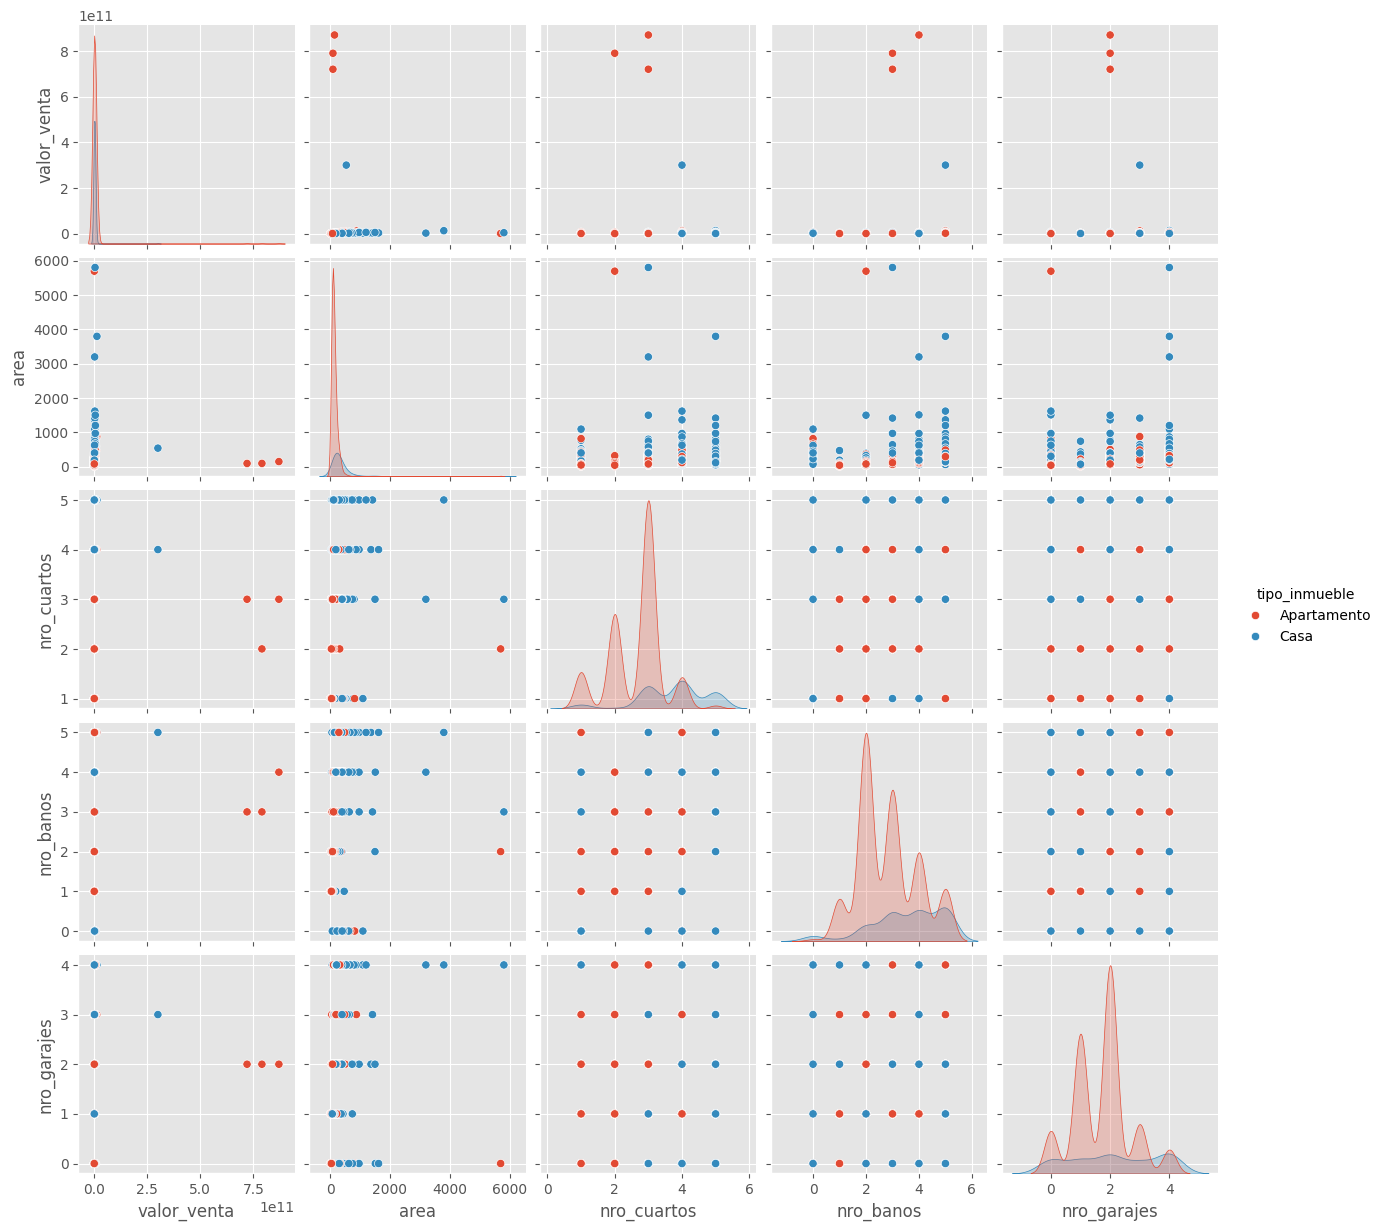

In [21]:
sns.pairplot(data_AED,hue='tipo_inmueble')

In [22]:
px.histogram(data_AED['valor_venta'],title='Distibución valor de venta')

Teniendo en cuenta que la variable se distribuyen en miles de millones de pesos,se transformaran los datos con el logaritmo base 10 para continuar con el ejercicio.

In [23]:
px.histogram(np.log10(data_AED['valor_venta']),title='Distribución del logaritmo base 10 del valor de venta')

In [24]:
data_AED['log_valor'] = np.log10(data_AED['valor_venta'])
data_AED.head()

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio,log_valor
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS,8.585461
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL,8.280601
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza,8.857332
3,Casa,1018660600,173.0,3.0,4.0,1.0,Otros,Desconocido,Desconocido,9.008030
4,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES,9.267172


In [25]:
px.histogram(data_AED,x='area')

In [26]:
px.histogram(np.log10(data_AED['area']),title='Distribución del logaritmo base 10 del area en m²')

In [27]:
data_AED['log_area'] = np.log10(data_AED['area'])
data_AED

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio,log_valor,log_area
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS,8.585461,2.000000
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL,8.280601,1.531479
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza,8.857332,2.195900
3,Casa,1018660600,173.0,3.0,4.0,1.0,Otros,Desconocido,Desconocido,9.008030,2.238046
4,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES,9.267172,2.278754
...,...,...,...,...,...,...,...,...,...,...,...
9994,Apartamento,106000000,42.0,2.0,1.0,0.0,Occidental,CAMPO ALEGRE,EL TINTAL,8.025306,1.623249
9996,Casa,330000000,72.0,3.0,2.0,1.0,Norte,LA LIBERIA,LAS MARGARITAS,8.518514,1.857332
9997,Casa,1200000000,400.0,3.0,4.0,3.0,Norte,EL CONTADOR,El Contador,9.079181,2.602060
9998,Casa,642000000,191.0,4.0,4.0,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira,8.807535,2.281033


## Analisis descriptivo bivariado

In [28]:
corr_matriz = data_AED.drop(columns=['valor_venta','area']).select_dtypes(np.number).corr()
corr_matriz

,nro_cuartos,nro_banos,nro_garajes,log_valor,log_area
nro_cuartos,1.000000,0.568626,0.313018,0.312784,0.587166
nro_banos,0.568626,1.000000,0.581542,0.561910,0.684869
nro_garajes,0.313018,0.581542,1.000000,0.587097,0.611501
log_valor,0.312784,0.561910,0.587097,1.000000,0.710374
log_area,0.587166,0.684869,0.611501,0.710374,1.000000


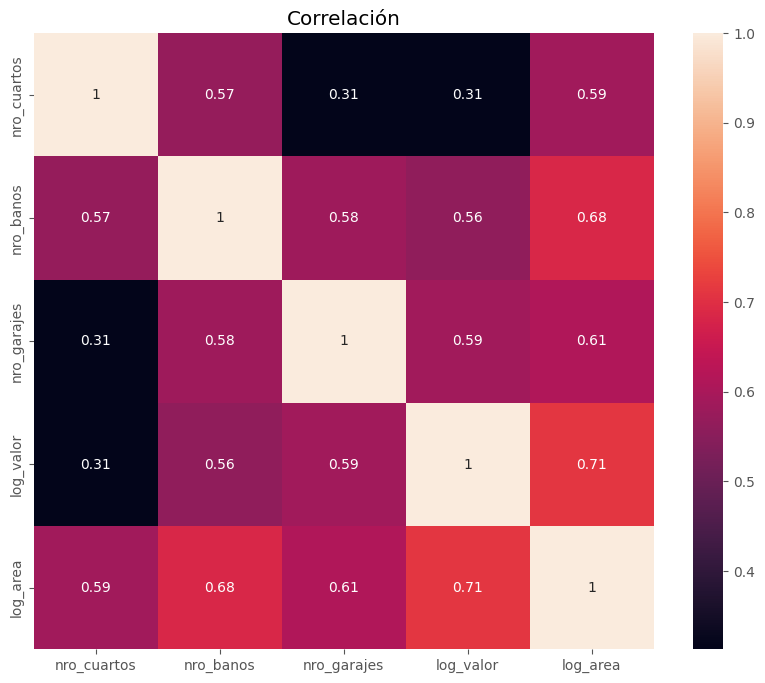

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matriz,annot=True)
plt.title('Correlación')
plt.show()

In [30]:
px.scatter(data_AED, y= 'log_valor',x='log_area', color='tipo_inmueble')

Se observa que se tienen datos atipicos en el valor de venta, para lo cual no se tendran en cuenta en el modelado.

In [31]:
data_AED = data_AED[(data_AED['log_valor']<11)&(data_AED['log_valor']>7)]
data_AED

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio,log_valor,log_area
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS,8.585461,2.000000
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL,8.280601,1.531479
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza,8.857332,2.195900
3,Casa,1018660600,173.0,3.0,4.0,1.0,Otros,Desconocido,Desconocido,9.008030,2.238046
4,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES,9.267172,2.278754
...,...,...,...,...,...,...,...,...,...,...,...
9994,Apartamento,106000000,42.0,2.0,1.0,0.0,Occidental,CAMPO ALEGRE,EL TINTAL,8.025306,1.623249
9996,Casa,330000000,72.0,3.0,2.0,1.0,Norte,LA LIBERIA,LAS MARGARITAS,8.518514,1.857332
9997,Casa,1200000000,400.0,3.0,4.0,3.0,Norte,EL CONTADOR,El Contador,9.079181,2.602060
9998,Casa,642000000,191.0,4.0,4.0,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira,8.807535,2.281033


In [32]:
px.scatter(data_AED, y= 'log_valor',x='log_area',color='tipo_inmueble')

# Modelado

In [55]:
data_mod = data_AED.copy()

X = data_mod[['log_area']]
y = data_mod['log_valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test:  {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de X_test:  {y_test.shape}')

Dimensiones de X_train: (1285, 1)
Dimensiones de X_test:  (322, 1)
Dimensiones de y_train: (1285,)
Dimensiones de X_test:  (322,)


## Regresión lineal

<Axes: xlabel='log_valor', ylabel='Count'>

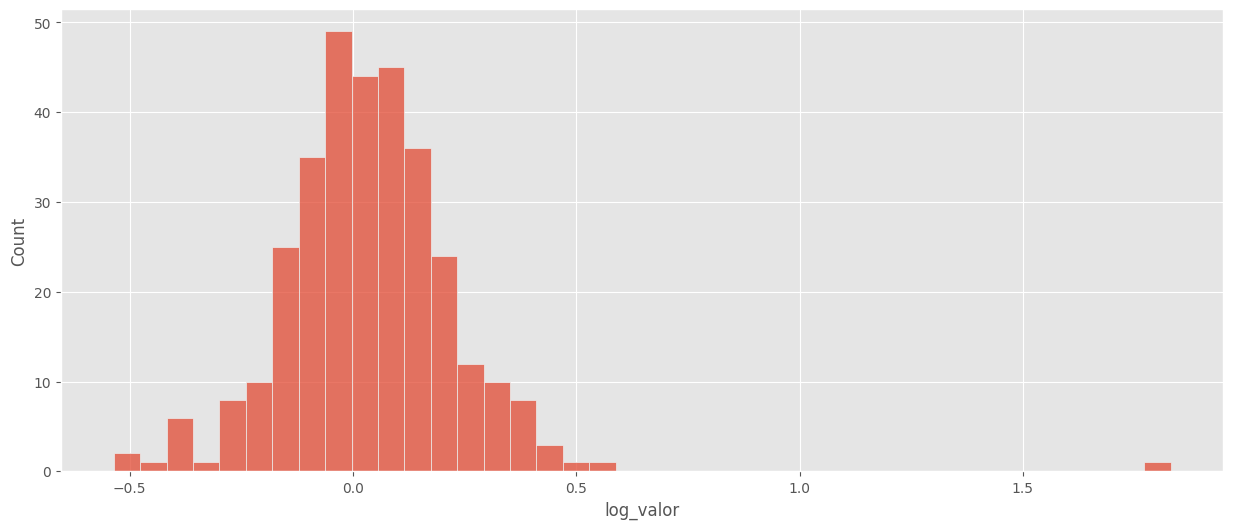

In [56]:
modelo_rl = LinearRegression()
modelo_rl.fit(X_train,y_train)
y_pred = modelo_rl.predict(X_test)

residuales_rl = y_pred-y_test
sns.histplot(residuales_rl)

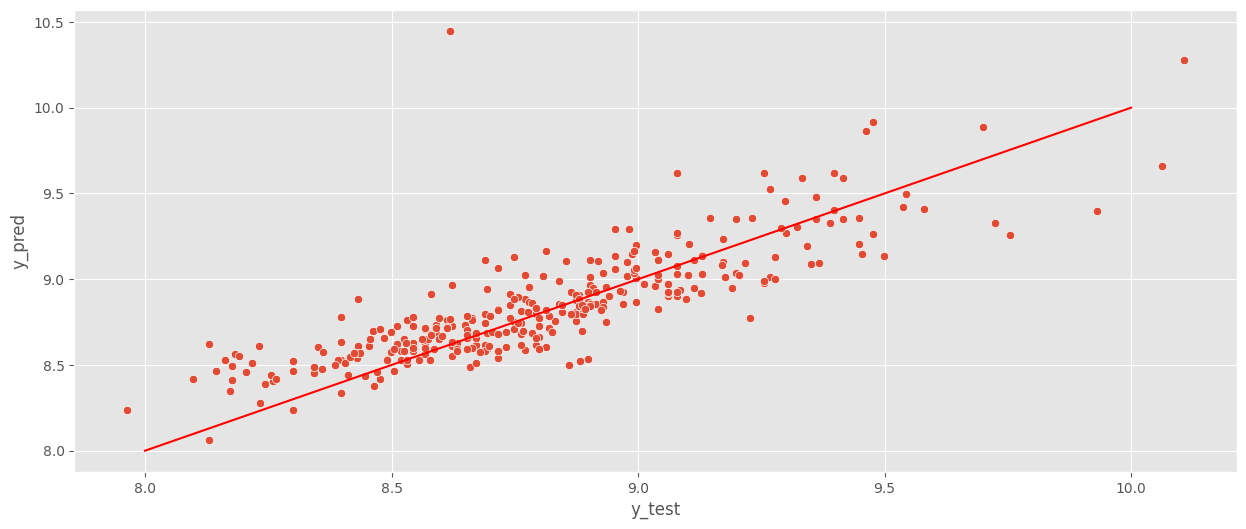

In [57]:
sns.scatterplot(x=y_test, y=y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.plot([8,10], [8,10], 'r-')

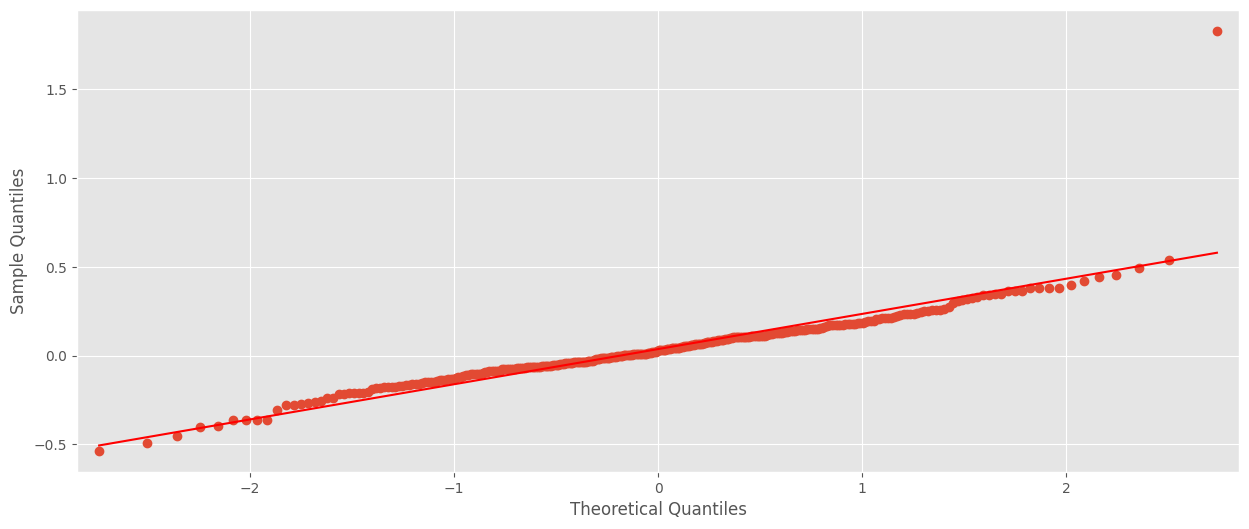

In [58]:
qqplot(residuales_rl, line='s')
plt.show()

In [ ]:
print(f'RMSE: {mean_squared_error(10**y_test, 10**y_pred, squared=False)}')
print(f'MAE:  {mean_absolute_error(10**y_test, 10**y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(10**y_test, 10**y_pred)*100}')

RMSE: 1788575683.7971828
MAE:  453754357.58559895
MAPE: 55.88154892151784


El valor de MAPE indica que se esta equivocando un 55%, este valor es muy alto, lo cual no permite que el modelo se evalue de manera correcta, ahora se identifica cual puede ser la causa del mismo.

In [60]:
residuales_rl.sort_values(ascending=False)

2245    1.830653
1239    0.541292
3721    0.491715
8710    0.453946
4485    0.440954
          ...   
155    -0.396164
2722   -0.404212
123    -0.451136
78     -0.494234
726    -0.535368
Name: log_valor, Length: 322, dtype: float64

El registro que tiene una diferencia mas alta entre la predicción y el test es el **2245**

In [61]:
data_mod.loc[2245]

tipo_inmueble             Apartamento
valor_venta                 415000000
area                           5700.0
nro_cuartos                       2.0
nro_banos                         2.0
nro_garajes                       0.0
zona                            Norte
barrio                 MOCHUELO NORTE
nombre_comun_barrio           Usaquen
log_valor                    8.618048
log_area                     3.755875
Name: 2245, dtype: object

Vamos a comparar como es el area en la misma zona en la que se encuentra este apartamento, para poder identificar el problema de manera correcta.

In [67]:
data_mod[(data_mod['zona']== 'Norte')].sort_values('area',ascending=False)

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio,log_valor,log_area
2245,Apartamento,415000000,5700.0,2.0,2.0,0.0,Norte,MOCHUELO NORTE,Usaquen,8.618048,3.755875
980,Casa,12800000000,3800.0,5.0,5.0,4.0,Norte,SANTA ANA ORIENTAL,SANTA ANA ORIENTAL,10.107210,3.579784
7249,Casa,5400000000,1200.0,5.0,5.0,4.0,Norte,SANTA ANA OCCIDENTAL,SANTA ANA OCCIDENTAL,9.732394,3.079181
4465,Casa,6900000000,968.0,4.0,5.0,0.0,Norte,BOSQUE DE PINOS,BOSQUE DE PINOS,9.838849,2.985875
3964,Apartamento,6000000000,818.0,1.0,0.0,0.0,Norte,MOLINOS NORTE,MOLINOS NORTE,9.778151,2.912753
...,...,...,...,...,...,...,...,...,...,...,...
3242,Apartamento,250000000,27.0,1.0,1.0,1.0,Norte,BELLA SUIZA,BELLA SUIZA ALTA,8.397940,1.431364
2225,Apartamento,260000000,27.0,1.0,1.0,1.0,Norte,ANTIGUO COUNTRY,FEDUR,8.414973,1.431364
3715,Apartamento,121730000,20.0,1.0,1.0,1.0,Norte,EL CODITO,EL REDIL,8.085398,1.301030
1241,Apartamento,134840000,20.0,1.0,1.0,1.0,Norte,EL CODITO,EL REDIL,8.129819,1.301030


Teniendo en cuenta que es un apartamento, el área es muy grande incluso mas que para una casa en la misma zona, podemos imputar el valor del área de acuerdo a estas caracteristicas y de acuerdo con el precio para poder tomar una decisión.

In [72]:
data_mod[(data_mod['zona']== 'Norte')&(data_mod['valor_venta']<450000000)&(data_mod['valor_venta']>400000000)&(data_mod['tipo_inmueble']=='Apartamento')].sort_values('valor_venta',ascending=False)

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio,log_valor,log_area
9211,Apartamento,448251000,71.0,2.0,3.0,1.0,Norte,LISBOA,LISBOA SECTOR COUNTRY,8.651521,1.851258
747,Apartamento,445000000,94.0,3.0,2.0,1.0,Norte,SAN ANTONIO NOR - OCCIDENTAL,TOBERIN ORQUIDEAS,8.648360,1.973128
6242,Apartamento,440000000,109.0,3.0,3.0,2.0,Norte,MOLINOS NORTE,MOLINOS NORTE,8.643453,2.037426
102,Apartamento,437904000,73.0,2.0,2.0,1.0,Norte,LOS CEDROS,Nueva Autopista-Usaquén,8.641379,1.863323
1497,Apartamento,435000000,81.0,1.0,2.0,1.0,Norte,LOS CEDROS,NUEVA AUTOPISTA,8.638489,1.908485
1732,Apartamento,430000000,89.0,2.0,3.0,1.0,Norte,SAN PATRICIO,SAN PATRICIO,8.633468,1.949390
6223,Apartamento,430000000,76.0,2.0,2.0,1.0,Norte,CERROS DE SANTA BARBARA,SANTA ANA OCCIDENTAL,8.633468,1.880814
4491,Apartamento,430000000,65.0,1.0,2.0,1.0,Norte,SANTA BARBARA CENTRAL,SANTA BARBARA,8.633468,1.812913
3962,Apartamento,430000000,81.0,3.0,2.0,2.0,Norte,FOLEDO,FOLEDO,8.633468,1.908485
9962,Apartamento,430000000,67.0,2.0,2.0,1.0,Norte,CONTADOR,LA BELLA SUIZA,8.633468,1.826075


Se corrige el valor dejandolo en 57 m²

In [73]:
data_mod['area'][2245] = 57
data_mod['log_area'][2245] = np.log10(57)
data_mod.loc[2245]

tipo_inmueble             Apartamento
valor_venta                 415000000
area                             57.0
nro_cuartos                       2.0
nro_banos                         2.0
nro_garajes                       0.0
zona                            Norte
barrio                 MOCHUELO NORTE
nombre_comun_barrio           Usaquen
log_valor                    8.618048
log_area                     1.755875
Name: 2245, dtype: object

Ahora es necesario volver a realizar la evaluación del modelo

In [131]:
X = data_mod[['log_area']]
y = data_mod['log_valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test:  {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test:  {y_test.shape}')

Dimensiones de X_train: (1285, 1)
Dimensiones de X_test:  (322, 1)
Dimensiones de y_train: (1285,)
Dimensiones de y_test:  (322,)


<Axes: xlabel='log_valor', ylabel='Count'>

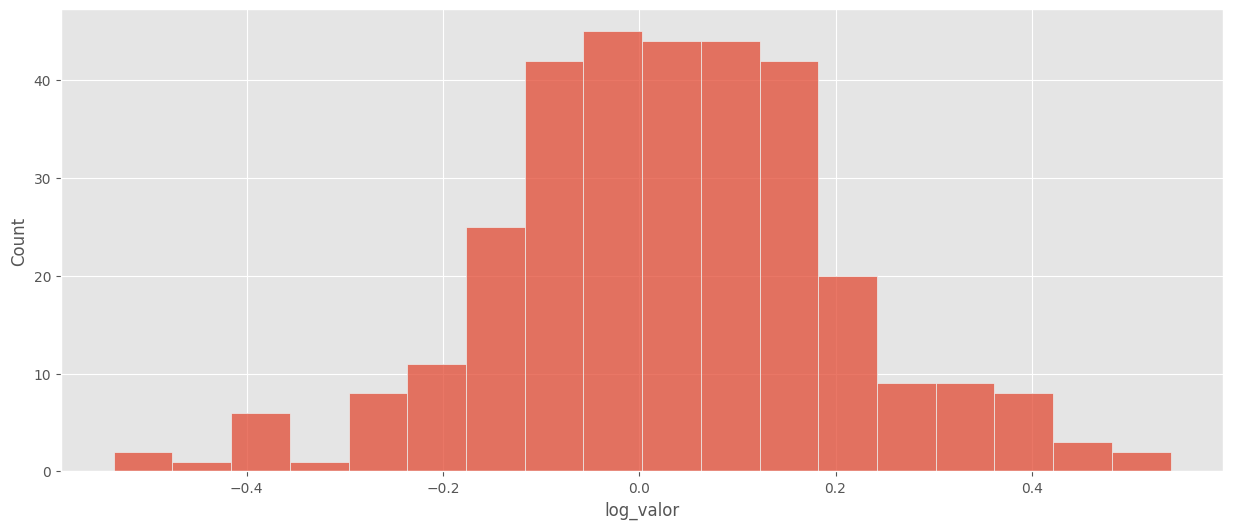

In [75]:
modelo_rl = LinearRegression()
modelo_rl.fit(X_train,y_train)
y_pred = modelo_rl.predict(X_test)

residuales_rl = y_pred-y_test
sns.histplot(residuales_rl)

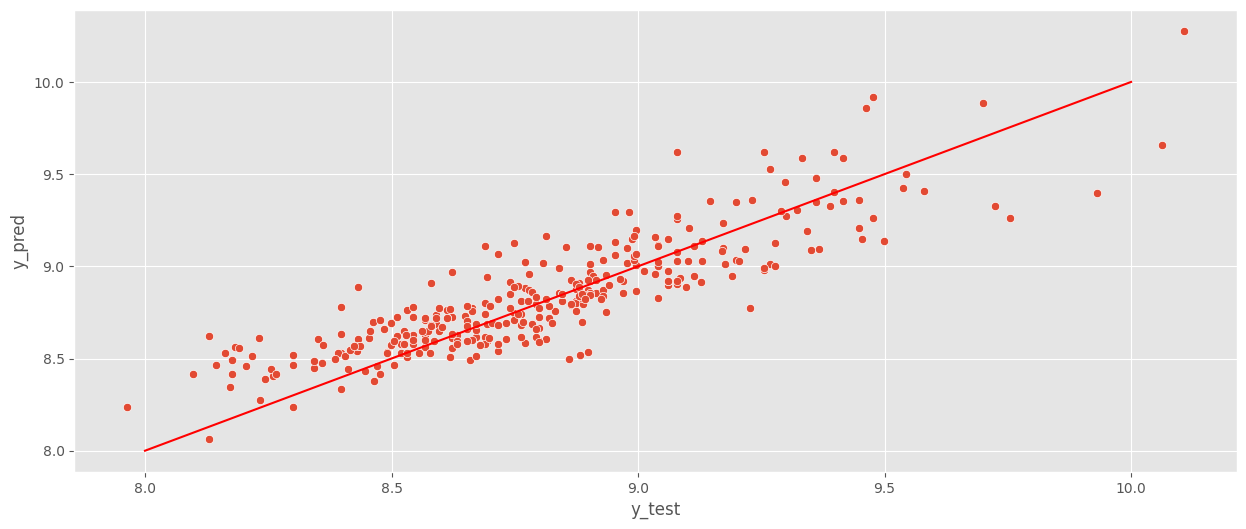

In [76]:
sns.scatterplot(x=y_test, y=y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.plot([8,10], [8,10], 'r-')

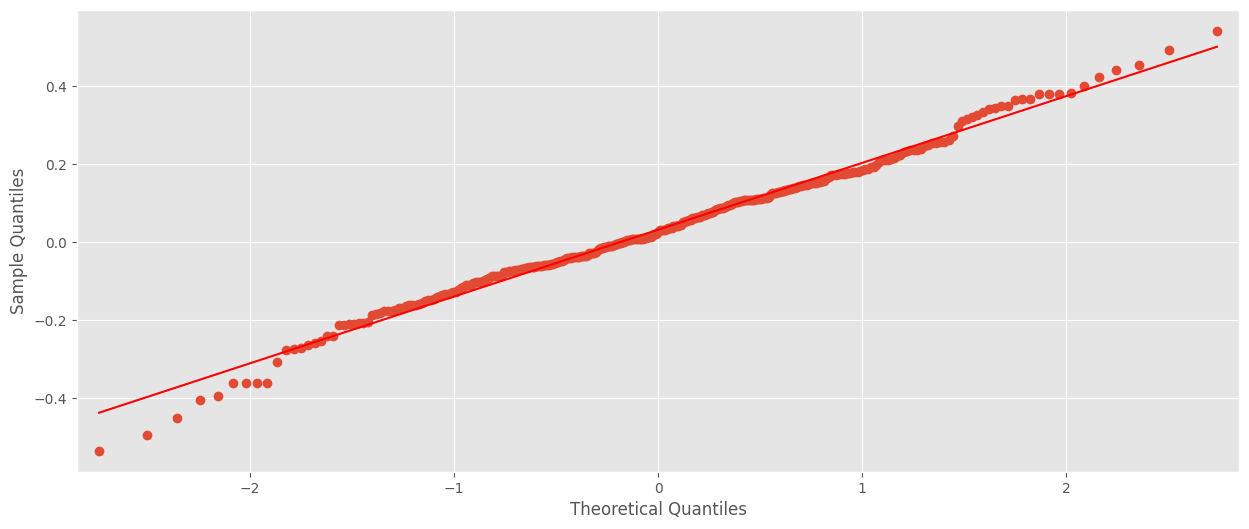

In [77]:
qqplot(residuales_rl, line='s')
plt.show()

In [78]:
print(f'RMSE: {mean_squared_error(10**y_test, 10**y_pred, squared=False)}')
print(f'MAE:  {mean_absolute_error(10**y_test, 10**y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(10**y_test, 10**y_pred)*100}')

RMSE: 904862339.3606827
MAE:  368069472.4626984
MAPE: 35.2345886509394


Nuestro modelo se esta equivocando un 35%, el ajuste realizado permitio disminuirlo.

## Arbol de decisión

In [162]:
data_arbol = data_mod.copy()

data_arbol = data_arbol.drop(columns=['zona','barrio','nombre_comun_barrio'], axis=1)

X = data_arbol.drop('tipo_inmueble',axis=1)
y = data_arbol['tipo_inmueble']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test:  {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test:  {y_test.shape}')

Dimensiones de X_train: (1285, 7)
Dimensiones de X_test:  (322, 7)
Dimensiones de y_train: (1285,)
Dimensiones de y_test:  (322,)


In [191]:
modelo_ar = DecisionTreeClassifier(
    max_depth=3,
    criterion= 'gini',
    min_samples_leaf= 1, 
    min_samples_split = 2,
    class_weight='balanced',
    random_state=42
)
modelo_ar.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

[Text(0.5, 0.875, 'nro_cuartos <= 3.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = Casa'),
 Text(0.25, 0.625, 'log_area <= 2.145\ngini = 0.417\nsamples = 78.3%\nvalue = [0.704, 0.296]\nclass = Casa'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'nro_cuartos <= 2.5\ngini = 0.198\nsamples = 49.8%\nvalue = [0.889, 0.111]\nclass = Casa'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 23.8%\nvalue = [1.0, 0.0]\nclass = Casa'),
 Text(0.1875, 0.125, 'gini = 0.319\nsamples = 26.0%\nvalue = [0.801, 0.199]\nclass = Casa'),
 Text(0.375, 0.375, 'log_valor <= 8.823\ngini = 0.499\nsamples = 28.5%\nvalue = [0.481, 0.519]\nclass = Apartamento'),
 Text(0.3125, 0.125, 'gini = 0.187\nsamples = 2.5%\nvalue = [0.104, 0.896]\nclass = Apartamento'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 26.0%\nvalue = [0.548, 0.452]\nclass = Casa'),
 Text(0.75, 0.625, 'valor_venta <= 2274999936.0\ngini = 0.234\nsamples = 21.7%\nvalue = [0.135, 0.865]\nclass = Apartamento'),
 Text(0.625, 0.75, '  Fal

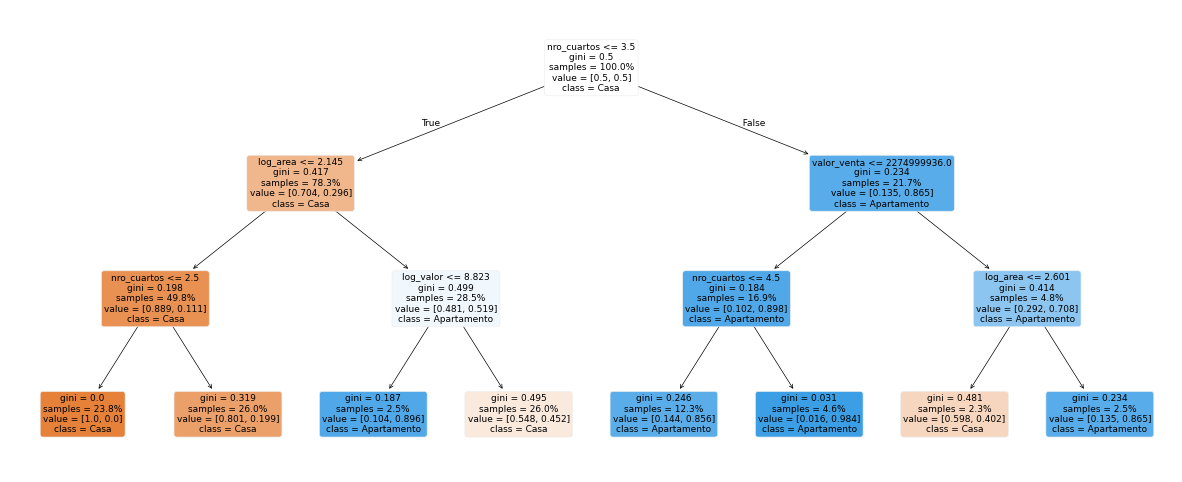

In [192]:
plot_tree(
    modelo_ar,filled=True,rounded=True, feature_names=X.columns,
    class_names=['Casa','Apartamento'],proportion=True
)

In [193]:
prediccion = modelo_ar.predict(X=X_test)
prediccion

array(['Apartamento', 'Apartamento', 'Casa', 'Casa', 'Apartamento',
       'Apartamento', 'Casa', 'Casa', 'Apartamento', 'Apartamento',
       'Apartamento', 'Apartamento', 'Casa', 'Casa', 'Apartamento',
       'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento',
       'Apartamento', 'Casa', 'Apartamento', 'Casa', 'Apartamento',
       'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento',
       'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento',
       'Apartamento', 'Apartamento', 'Casa', 'Casa', 'Apartamento',
       'Casa', 'Casa', 'Apartamento', 'Casa', 'Apartamento',
       'Apartamento', 'Apartamento', 'Apartamento', 'Casa', 'Casa',
       'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento',
       'Apartamento', 'Apartamento', 'Apartamento', 'Casa', 'Apartamento',
       'Apartamento', 'Apartamento', 'Casa', 'Apartamento', 'Apartamento',
       'Apartamento', 'Apartamento', 'Apartamento', 'Casa', 'Apartamento',
       'Casa', 'Apartamento', 'Apartam

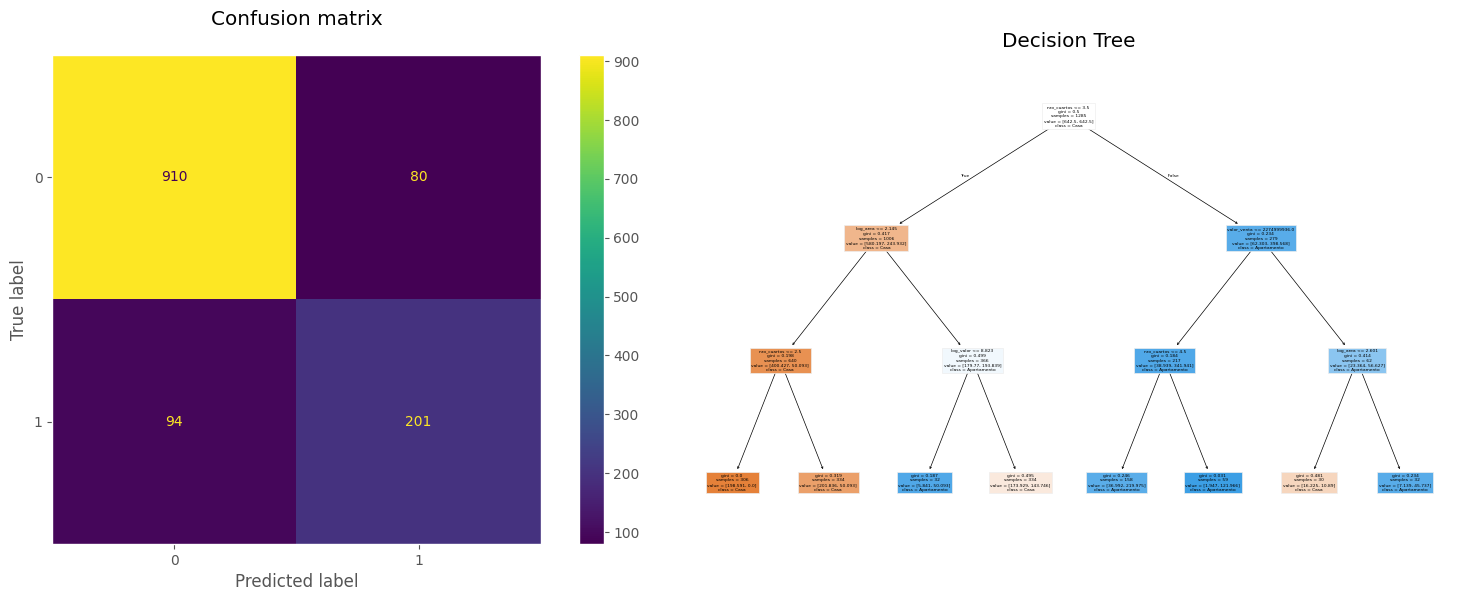

Accuracy en train es: 86.46 %
Accuracy en test es:  87.27 %


In [194]:
cm = confusion_matrix(y_train, modelo_ar.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
disp.plot(ax=axes[0])
axes[0].set_title("Confusion matrix\n")
axes[0].grid(False)

plot_tree(modelo_ar, feature_names=X_train.columns, filled=True, class_names=['Casa','Apartamento'])
axes[1].set_title("Decision Tree")
plt.tight_layout()
plt.show()

accuracy_train = accuracy_score(y_train, modelo_ar.predict(X_train))
accuracy_test = accuracy_score(y_test, modelo_ar.predict(X_test))
print(f"Accuracy en train es: {100 * accuracy_train:.2f} %")
print(f"Accuracy en test es:  {100 * accuracy_test:.2f} %")

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir los hiperparámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo y realizar la búsqueda
modelo_arbol = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(modelo_arbol, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Random Forest

<Axes: xlabel='log_valor', ylabel='Count'>

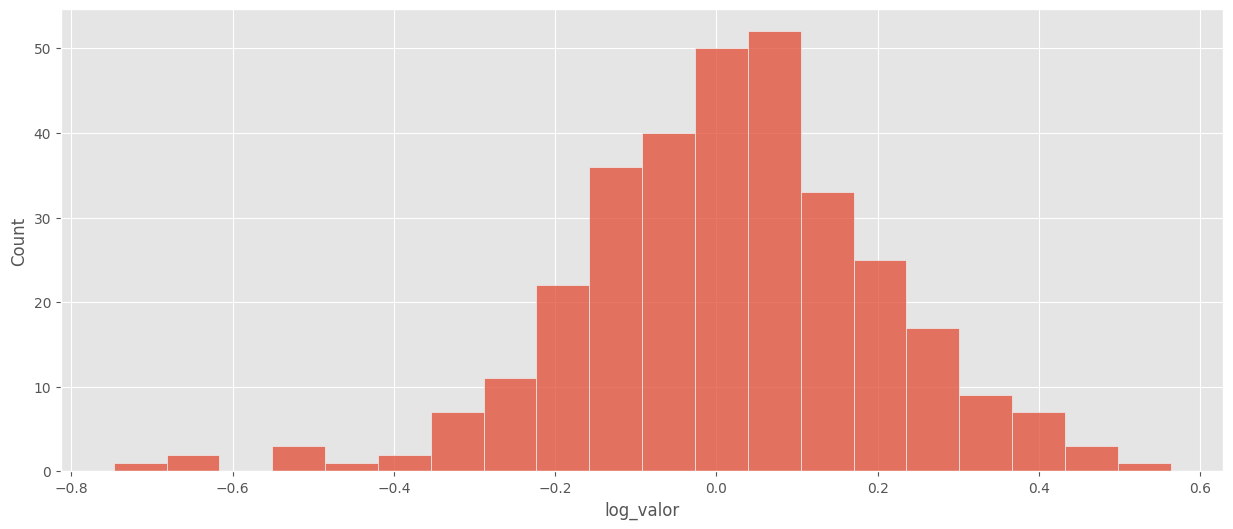

In [99]:
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train,y_train)
y_pred_rf = modelo_rf.predict(X_test)

residuales_rf = y_pred_rf-y_test
sns.histplot(residuales_rf)

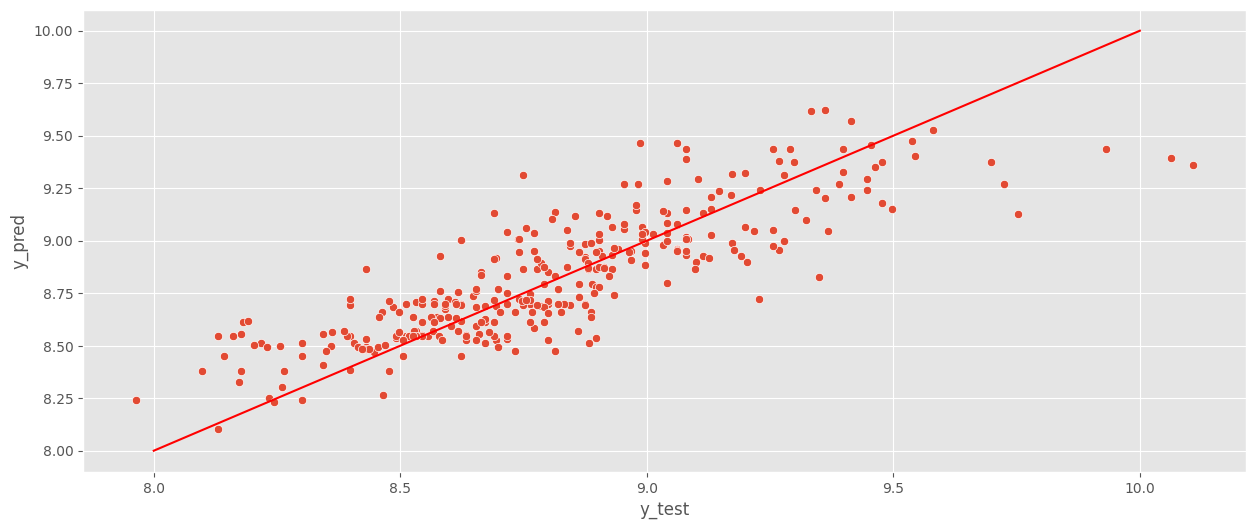

In [100]:
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.plot([8,10], [8,10], 'r-')

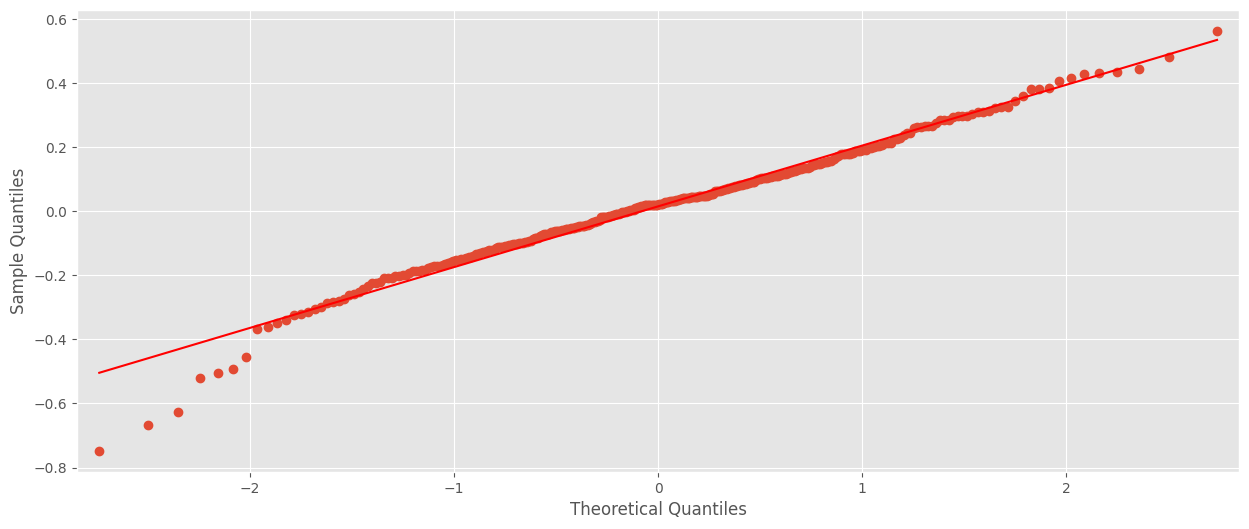

In [101]:
qqplot(residuales_rf, line='s')
plt.show()

In [102]:
print(f'RMSE: {mean_squared_error(10**y_test, 10**y_pred_rf, squared=False)}')
print(f'MAE:  {mean_absolute_error(10**y_test, 10**y_pred_rf)}')
print(f'MAPE: {mean_absolute_percentage_error(10**y_test, 10**y_pred_rf)*100}')

RMSE: 1007357721.0008746
MAE:  379275835.1181187
MAPE: 36.24615114645848


El error es del 36.2 %